<a href="https://colab.research.google.com/github/Adesanza/dataline/blob/main/Data%20Science/Intertrack_Restaurant_Weekly_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Weekly Sales Prediction

## Abstract

## Introduction

## Data Engineering

**Importing Necessary Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='darkgrid')
import pickle

## Load Data

In [ ]:
data = pd.read_csv('train_data_cleaned.csv')
#Data preview
data.head(5)

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
0,201801,14919,Shrimp & Broccoli Stir-Fry,2 person,687.0,99.2,time_level_4,asian,"For this dish, once the ingredients are preppe...",easy,fish,optional_heat,18.6,No,7,shellfish,rice,"fish_and_side,stir_fry",all_seasons,shellfish,29.5,main,NaN,healthy_choice,0.0,NaN,3567
1,201801,14920,Caramelized Cabbage Pasta,2 person,779.0,81.3,time_level_4,new_american,Red lentil penne makes this pasta dish a pleas...,easy,veggie,no_heat,38.5,No,5,no_protein,pasta_incl_gnocchi_spatzle,pasta,all_seasons,no_protein,30.0,main,NaN,quick,0.0,no_cut,2532
2,201801,14449,AFC Vegetarian Pad Thai,z_amazon,642.0,92.8,NaN,NaN,Pad Thai is one of our favorite street foods t...,easy,veggie,NaN,25.6,No,10,NaN,NaN,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN,NaN,6
3,201801,11963,Shrimp & Broccoli Stir-Fry,family,620.0,93.2,time_level_4,asian,"For this dish, once the ingredients are preppe...",easy,fish,optional_heat,13.7,No,7,shellfish,rice,"fish_and_side,stir_fry",all_seasons,shellfish,28.7,main,NaN,healthy_choice,0.0,NaN,642
4,201801,14914,Chicken & Pasta Soup,family,610.0,67.0,time_level_4,new_american,"We've never met a chicken soup we didn't like,...",easy,meat,no_heat,20.0,No,7,poultry,"sweet_potato,pasta_incl_gnocchi_spatzle",soup,all_seasons,poultry,36.0,main,NaN,healthy_choice,0.0,breast,1492


In [ ]:
table = pd.DataFrame({"Column" : list(data.isnull().sum().index),
                      "Null Values" : data.isnull().sum().values,
                      "Unique Values": [len(data[x].unique()) for x in data.columns],
                      "Dtype" : data.dtypes.values
                      })

In [ ]:
#Getting insight on missing values, data type and unique values
table

,Column,Null Values,Unique Values,Dtype
0,year_week,0,96,int64
1,recipe_id,0,1931,int64
2,recipe_name,0,931,object
3,product_type,0,4,object
4,calories,6,393,float64
5,carbs,47,406,float64
6,cooking_time,291,6,object
7,cuisine,833,28,object
8,description,4,981,object
9,difficulty,9,2,object


In [ ]:
#Removing columns with numerous unique values and no valid contribution to the target variable.
strpCol = ['year_week', 'recipe_id','recipe_name','cooking_tip', 'description', 'is_classic', 'course_type', 'difficulty', 'dish_types', 'seasons', 'carbs_content', 'percentage_of_local_ingredients', 'protein_cuts', 'meta_tags', 'course_type']
FullTable = data[[x for x in data.columns if x not in strpCol]]

In [ ]:
FullTable

,product_type,calories,carbs,cooking_time,cuisine,dish_type,heat_level,fat,number_of_ingredients_per_recipe,preferences,protein_types,proteins,sales
0,2 person,687.0,99.2,time_level_4,asian,fish,optional_heat,18.6,7,shellfish,shellfish,29.5,3567
1,2 person,779.0,81.3,time_level_4,new_american,veggie,no_heat,38.5,5,no_protein,no_protein,30.0,2532
2,z_amazon,642.0,92.8,NaN,NaN,veggie,NaN,25.6,10,NaN,NaN,16.2,6
3,family,620.0,93.2,time_level_4,asian,fish,optional_heat,13.7,7,shellfish,shellfish,28.7,642
4,family,610.0,67.0,time_level_4,new_american,meat,no_heat,20.0,7,poultry,poultry,36.0,1492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,2 person,860.0,50.0,time_level_5,italian,veggie,no_heat,62.0,6,dairy,dairy,30.0,2015
2935,family,760.0,46.0,time_level_5,italian,veggie,no_heat,54.0,6,dairy,dairy,25.0,374
2936,2 person,960.0,104.0,time_level_4,thai,meat,no_heat,37.0,9,"fish,poultry","fish,poultry",56.0,1472
2937,2 person,760.0,51.0,time_level_5,new_american,meat,no_heat,42.0,8,"pork,poultry","pork,poultry",43.0,1134


In [ ]:
#Stripping out prefences. Has same data value as protein types.
FullTable.drop('preferences', 1, inplace=True )

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
FullTable.describe(include='all')

,product_type,calories,carbs,cooking_time,cuisine,dish_type,heat_level,fat,number_of_ingredients_per_recipe,protein_types,proteins,sales
count,2939,2933.000000,2892.000000,2648,2106,2521,2223,2892.000000,2939.000000,2238,2892.000000,2939.000000
unique,4,NaN,NaN,5,27,4,4,NaN,NaN,34,NaN,NaN
top,2 person,NaN,NaN,time_level_4,new_american,meat,no_heat,NaN,NaN,poultry,NaN,NaN
freq,1339,NaN,NaN,1359,897,1411,1874,NaN,NaN,446,NaN,NaN
mean,NaN,726.766792,64.969046,NaN,NaN,NaN,NaN,38.055595,7.046274,NaN,34.841110,2665.353862
std,NaN,169.665883,31.024875,NaN,NaN,NaN,NaN,28.815285,1.825963,NaN,12.763028,4765.205485
min,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,1.500000,3.000000
25%,NaN,616.000000,46.000000,NaN,NaN,NaN,NaN,27.175000,6.000000,NaN,26.000000,263.000000
50%,NaN,720.000000,63.500000,NaN,NaN,NaN,NaN,36.000000,7.000000,NaN,35.000000,829.000000
75%,NaN,834.000000,83.600000,NaN,NaN,NaN,NaN,45.000000,9.000000,NaN,43.600000,2315.500000


In [ ]:
#Filling missing values by method of mean and mode. 
def errorReplacer(table):
  '''
  table represent dataframe.
  Function identifies data type, check for the missing values and reccommends suitable method for replacing missing values.
  Mean for int or float datatype and mode for categorical data type. 
  '''
  df = table
  x = pd.DataFrame(df.isnull().sum())
  x = x[x[0] > 0]

  for i in x.index:
      if df[i].dtypes == 'float':
          mean = df[i].mean()
          df[i].replace(np.nan, mean, inplace = True)
          if df[i].dtypes == 'int':
              df[i] = df[i].astype(int)
          elif df[i].dtypes == 'float':
              pass
      elif df[i].dtypes == 'object':
          mode = df[i].mode()
          df[i] = df[i].replace({np.nan : mode.values})

In [ ]:
errorReplacer(FullTable)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Creating a list containing name of columns of categorical objects.
categoricalCols = [x for x in FullTable.columns if FullTable[x].dtypes == 'object']
TargetVar = ['sales']
numericalCols =  [x for x in FullTable.columns if x not in categoricalCols + TargetVar]

In [ ]:
CleanedTab = pd.DataFrame({"Column" : list(FullTable.isnull().sum().index),
                      "Null Values" : FullTable.isnull().sum().values,
                      "Unique Values": [len(FullTable[x].unique()) for x in FullTable.columns],
                      "Dtype" : FullTable.dtypes.values
                      })

In [ ]:
CleanedTab

,Column,Null Values,Unique Values,Dtype
0,product_type,0,4,object
1,calories,0,393,float64
2,carbs,0,406,float64
3,cooking_time,0,5,object
4,cuisine,0,27,object
5,dish_type,0,4,object
6,heat_level,0,4,object
7,fat,0,314,float64
8,number_of_ingredients_per_recipe,0,12,int64
9,protein_types,0,34,object


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


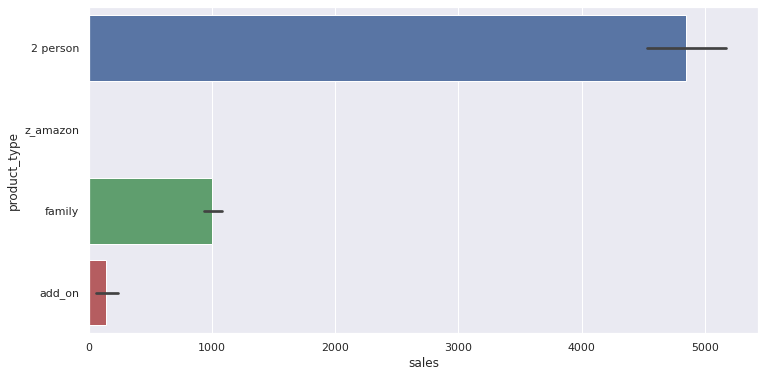

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


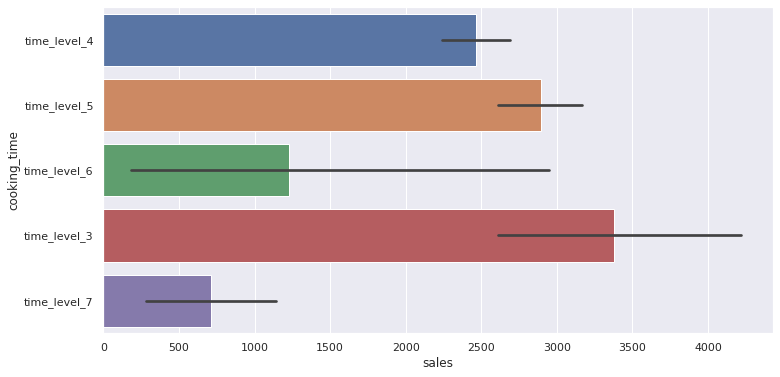

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


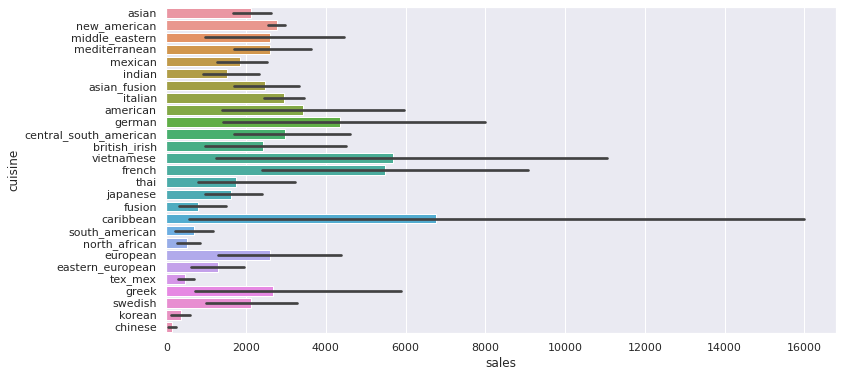

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


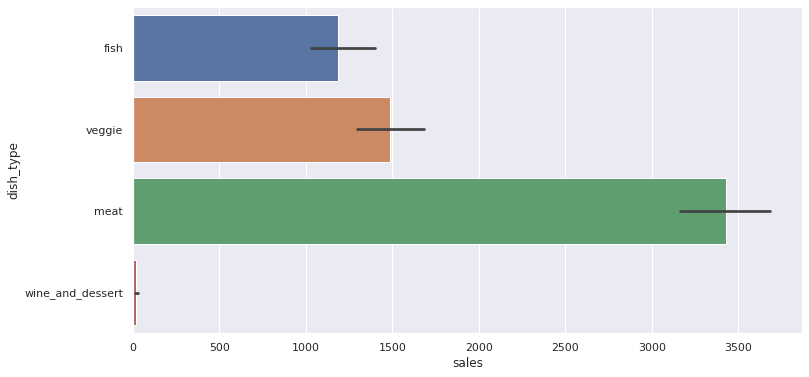

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


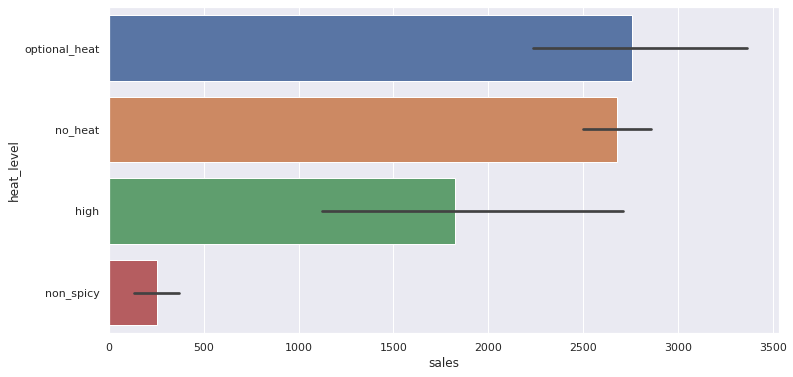

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


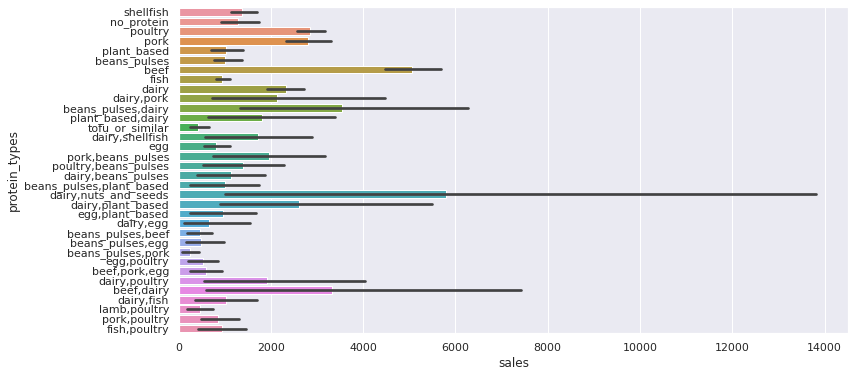

In [ ]:
# This function plots the varation of features as against the sales return using the total sum value
#Can give us better insights on the powerful deciding features on the the possibility of high sales return.
def barPlot(column):
  '''
  column takes the value of the current column feature which is used to plot against the sales column.
  '''
  fig = plt.figure(figsize = (12,6))
  sns.barplot( 'sales', column, data=FullTable)
  plt.show()

for i in categoricalCols:
  barPlot(i)

In [ ]:
#Grouping of simmilar products in protein types column
def ProCut(x):
  if x == 'shellfish' or x == 'fish' or x == 'tofu or similar':
    return 'fish'
  elif x == 'poultry' or x == 'egg' or x == 'dairy,egg' or x == 'beans_pulses,egg' or x == 'egg,poultry' or x == 'beef,pork,egg' or x == 'fish,poultry':
    return 'poultry products'
  elif x == 'plant_based' or x == 'beans_pulses' or x == 'beans_pulses,dairy' or x == 'plant_based,dairy' or x == 'pork,beans_pulses' or x == 'poultry,beans_pulses' or x == 'dairy,beans_pulses' or x == 'beans_pulses,plant_based' or x == 'dairy,nuts_and_seeds' or x == 'dairy,plant_based' or x == 'egg,plant_based' or x == 'beans_pulses,egg' or x == 'beans_pulses,pork':
    return 'plant products'
  elif x == 'pork' or x =='beef' or x == 'beef,dairy' or x == 'pork,dairy' or x == 'lamb,poultry' or x == 'pork,poultry':
    return 'meats'
  elif x == 'no_protein':
    return 'no protein'
  else:
    return 'dairy products'

In [ ]:
#Grouping of similar continents dish in cuisine types
def continentdish(x):
  if x == 'asian' or x == 'chinese' or x == 'korean' or x == 'vietnamese' or x == 'asian_fusion' or x == 'indian' or x == 'thai' or x == 'japaneese' or x == 'middle_eastern':
    return 'Asian'
  elif x == 'new_american' or x == 'mexican' or x == 'american' or x == 'tex_mex':
    return 'North American'
  elif x == 'swedish' or x == 'greek' or x == 'eastern_european' or x == 'european' or x == 'french' or x == 'british_irish' or x == 'german' or x == 'italian':
    return 'European'
  elif x == 'caribbean' or x == 'central_south_american' or x == 'south_american':
    return 'South American'
  else:
    return x

In [ ]:
FullTable['Protein_Class'] = FullTable['protein_types'].apply(ProCut)
FullTable['Cuisine'] = FullTable['cuisine'].apply(continentdish)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
FullTable.drop(['protein_types','cuisine'], 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


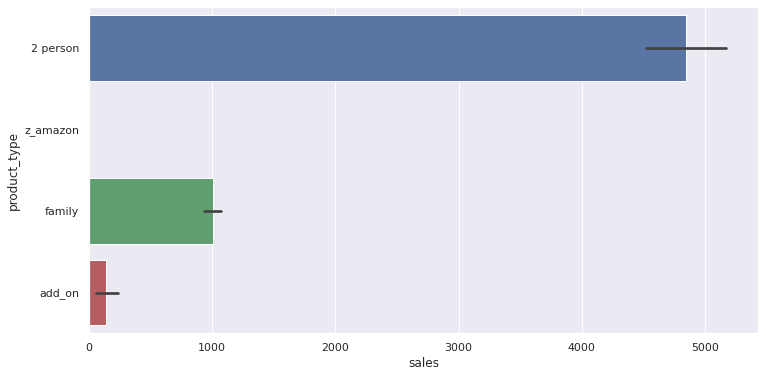

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


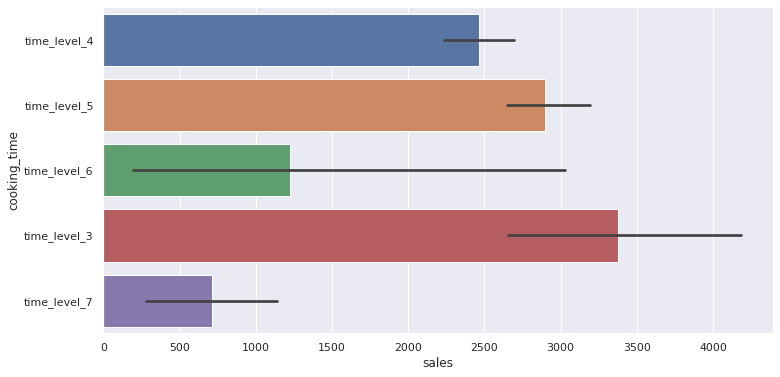

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


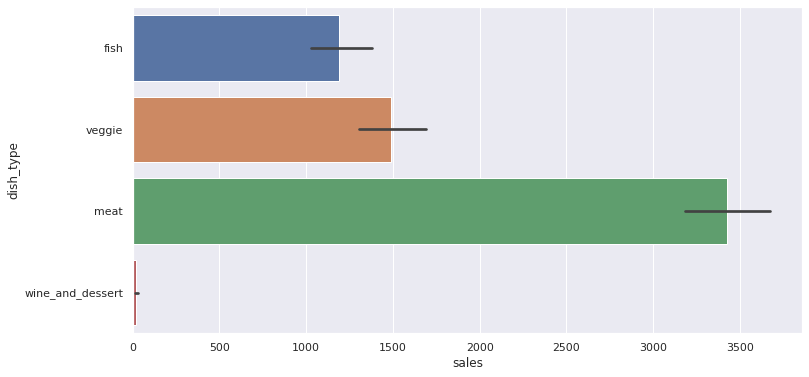

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


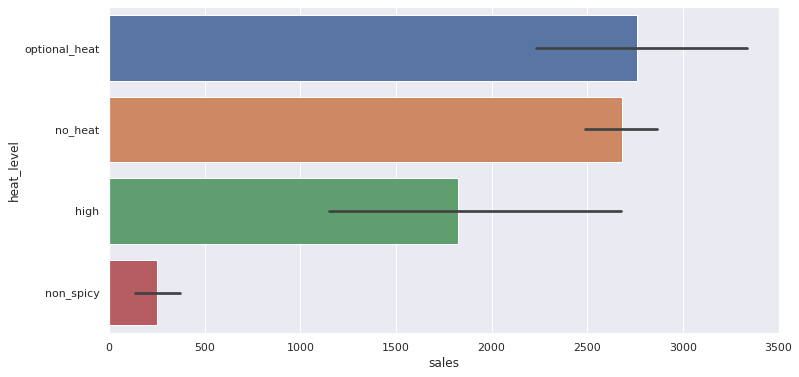

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


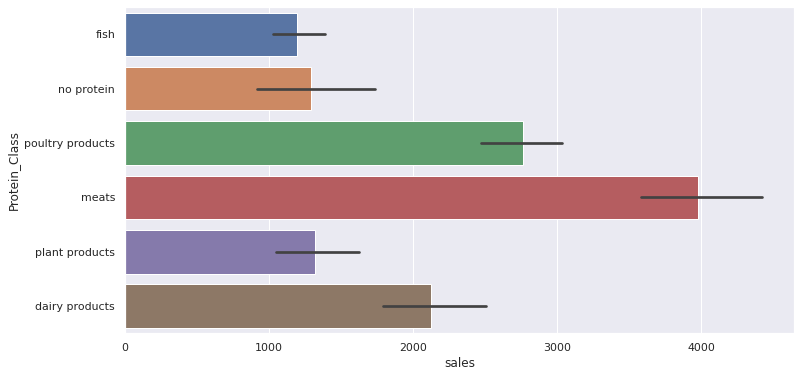

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


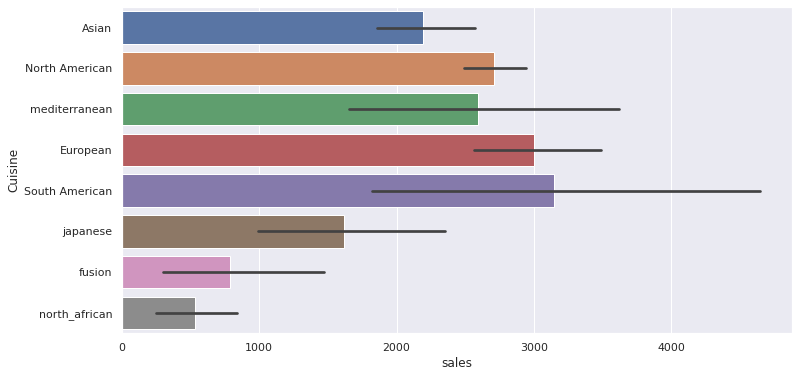

In [ ]:
#Creating a new list containing name of columns of categorical objects.
ncategoricalCols = [x for x in FullTable.columns if FullTable[x].dtypes == 'object']
nTargetVar = ['sales']
nnumericalCols =  [x for x in FullTable.columns if x not in categoricalCols + TargetVar]
for i in ncategoricalCols:
  barPlot(i)

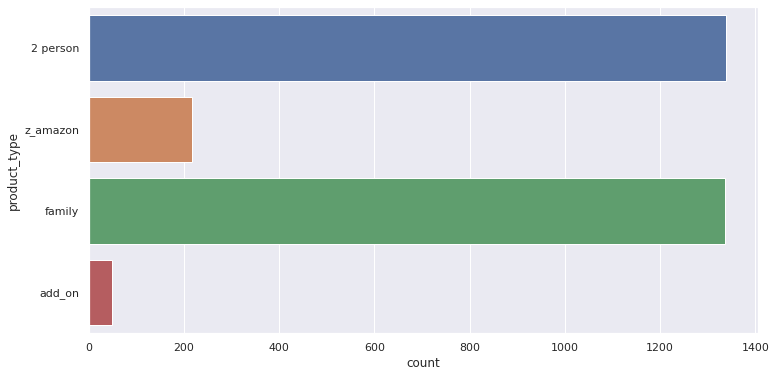

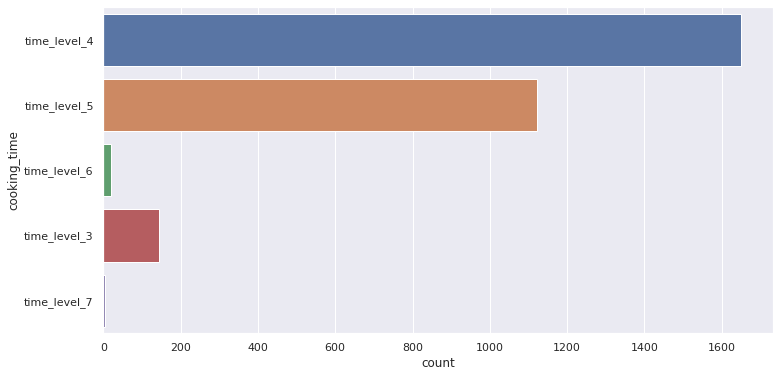

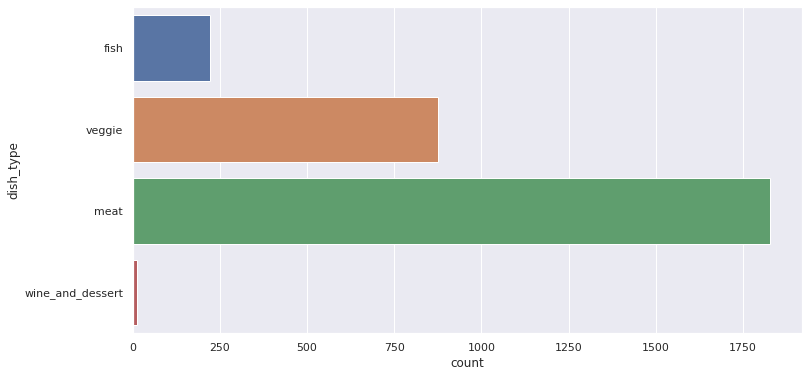

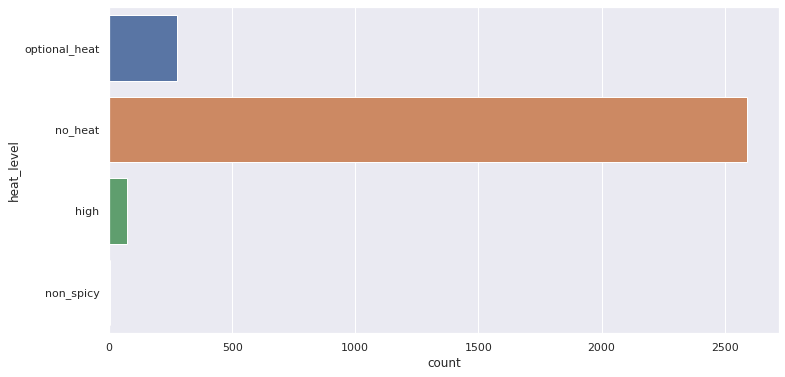

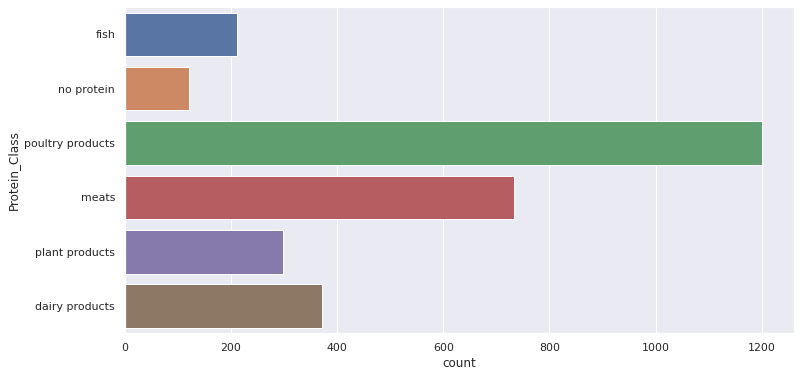

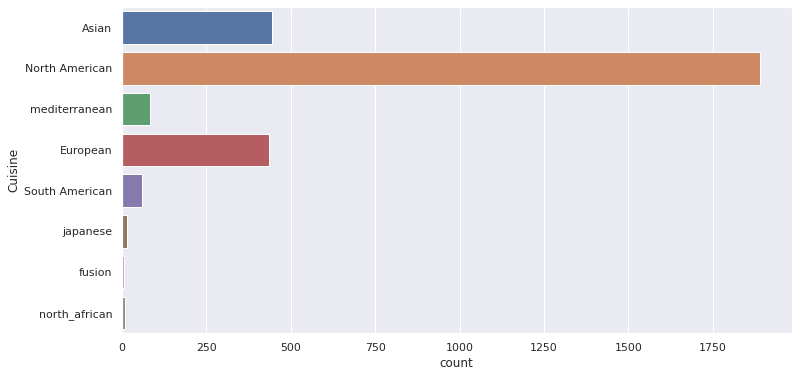

In [ ]:
def countPlot(column):
    '''
    column takes the value of the current column feature which is used to plot against the sales column.
    '''
    fig = plt.figure(figsize = (12,6))
    sns.countplot(y = column, data=FullTable)
    plt.show()
  
for i in ncategoricalCols:
  countPlot(i)

In [ ]:
#time)level_ and time_level_7 data points are extremely low and will create room for bisaement
heat = ['time_level_6', 'time_level_7']
for i in heat:
  FullTable.drop(axis=0, index = list(FullTable[FullTable['cooking_time'] == i].index), inplace=True)

#non_spicy data point is extremely low and will create room for bisaement
FullTable.drop(axis=0, index = list(FullTable[FullTable['heat_level']== 'non_spicy'].index), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
FullTable.to_csv('final_restaurant.csv', index=False)

Data Cleaning Technicque

Strip out columns containing more than 30% missing values of the total dataset
Strip out columns containing too many outliers
Strip out columns not enough to determine the sales return. 

In [ ]:
target = ['sales']
num_col = [x for x in testTab.columns if testTab[x].dtypes != 'object' and x not in target]

## Outliers Removal

In [ ]:
#Using Standard Deviation Method
data = pd.read_csv('final_restaurant.csv')
meanD, stD = np.mean(data['sales']), np.std(data['sales'])

cutoff = stD * 3

lower, upper = meanD - cutoff, meanD + cutoff

In [ ]:
outliers = [y for y, x in enumerate(data['sales']) if x < lower or x > upper]

In [ ]:
data.drop(outliers, inplace=True)

In [ ]:
data.describe()

,calories,carbs,fat,number_of_ingredients_per_recipe,proteins,sales
count,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000
mean,726.017382,65.595753,37.866199,7.071888,34.461167,1967.804721
std,170.618688,31.031169,29.181896,1.831600,11.964164,3341.127049
min,0.000000,3.000000,5.000000,0.000000,1.500000,3.000000
25%,610.000000,46.900000,27.000000,6.000000,26.000000,257.000000
50%,720.000000,64.969046,36.000000,7.000000,34.841110,766.500000
75%,834.000000,83.625000,44.925000,9.000000,43.000000,2094.500000
max,1380.000000,880.000000,664.000000,11.000000,94.000000,16969.000000


# Required buttons and data by software engineering team

In [ ]:
#Creating a list containing name of columns of new categorical objects and new numerical.
ncategoricalCols = [x for x in data.columns if data[x].dtypes == 'object']
nTargetVar = ['sales']
nnumericalCols =  [x for x in data.columns if x not in ncategoricalCols + nTargetVar]

In [ ]:
X = data.drop('sales', 1).reset_index(drop=True)
y = data['sales'].reset_index(drop=True)

In [ ]:
X = np.array(X)

In [ ]:
X[0]

array(['2 person', 687.0, 99.2, 'time_level_4', 'fish', 'optional_heat',
       18.6, 7, 29.5, 'fish', 'Asian'], dtype=object)

In [ ]:
for i in ncategoricalCols:
  print(i, data[i].unique())

product_type ['2 person' 'z_amazon' 'family' 'add_on']
cooking_time ['time_level_4' 'time_level_5' 'time_level_3']
dish_type ['fish' 'veggie' 'meat' 'wine_and_dessert']
heat_level ['optional_heat' 'no_heat' 'high']
Protein_Class ['fish' 'no protein' 'poultry products' 'meats' 'plant products'
 'dairy products']
Cuisine ['Asian' 'North American' 'mediterranean' 'European' 'South American'
 'japanese' 'fusion' 'north_african']


In [ ]:
for i in nnumericalCols:
  print(i, min(data[i]), max(data[i]))

calories 0.0 1380.0
carbs 3.0 880.0
fat 5.0 664.0
number_of_ingredients_per_recipe 0 11
proteins 1.5 94.0


In [ ]:
pd.DataFrame({
    "Name":["Product Type", "cooking Time", "Dish Type", "Heat Level", "Protein Class", "Cuisine", "Calories", "Carbs", "Fat", "Nos of Ingredients/Recipe", "Proteins"],
    "FieldType": ["Dropdown list","Dropdown list","Dropdown list","Dropdown list","Dropdown list","Dropdown list", "Inputfield", "Inputfield", "Inputfield", "Inputfield", "Inputfield" ],
    "VarChar" : ["Strings","Strings","Strings","Strings","Strings","Strings","float", "float", "float", "int64", "float"],
    "Values/Options" : ["2 person, z_amazon, family, add_on","'time_level_4, time_level_5, time_level_3", "fish, veggie, meat, wine_and_dessert", "optional_heat, no_heat, high", "fish, no protein, poultry products, meats, plant products, dairy products", "Asian, North American, mediterranean, European, South American, japanese, fusion, north_african", "0.0 - 999.0", "0.0 - 999.0", "0.0 - 999.0", "0 - 999", "0.0 - 999.0"],
}).to_csv('datapoints.csv', index=False)

# Model Development

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 57kB/s 


In [ ]:
import catboost 
from catboost import CatBoostRegressor
import sklearn 
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = [0, 3, 4, 5, 9, 10]
model = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)

In [ ]:
model.fit(X_train, y_train, cat_features)

0:	learn: 3004.0832934	total: 48.6ms	remaining: 48.6ms
1:	learn: 2947.2473281	total: 51.1ms	remaining: 0us


In [ ]:
pred = model.predict(X_test)

In [ ]:
for i in range(50):
  print("Predicted: ", pred[i], "Actual:", list(y_test)[i])


Predicted:  933.6243488578011 Actual: 69
Predicted:  201.17357911858198 Actual: 171
Predicted:  201.17357911858198 Actual: 6
Predicted:  2995.00554882798 Actual: 3044
Predicted:  2027.8677791278315 Actual: 516
Predicted:  688.3372212227966 Actual: 166
Predicted:  933.6243488578011 Actual: 410
Predicted:  3587.7155435017853 Actual: 1807
Predicted:  201.17357911858198 Actual: 159
Predicted:  201.17357911858198 Actual: 840
Predicted:  4554.853313201934 Actual: 1092
Predicted:  1420.7879909620158 Actual: 304
Predicted:  3587.7155435017853 Actual: 860
Predicted:  4554.853313201934 Actual: 13739
Predicted:  2027.8677791278315 Actual: 15103
Predicted:  933.6243488578011 Actual: 145
Predicted:  933.6243488578011 Actual: 6
Predicted:  933.6243488578011 Actual: 468
Predicted:  688.3372212227966 Actual: 103
Predicted:  2995.00554882798 Actual: 4508
Predicted:  201.17357911858198 Actual: 4
Predicted:  2027.8677791278315 Actual: 2145
Predicted:  201.17357911858198 Actual: 3799
Predicted:  688.33722

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'myModel.pkl')

['myModel.pkl']

In [ ]:
with open('catBoost.pkl', 'wb') as cat:
    pickle.dump(model, cat, pickle.HIGHEST_PROTOCO

TypeError: ignored

In [ ]:
X_test[45]

array(['z_amazon', 834.0, 110.4, 'time_level_4', 'meat', 'no_heat', 15.9,
       10, 57.4, 'poultry products', 'North American'], dtype=object)

In [ ]:
model.predict(['z_amazon', 834.0, 110.4, 'time_level_4', 'meat', 'no_heat', 15.9,
       10, 57.4, 'poultry products', 'North American'])

933.6243488578011